In [36]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# ANIMALS
ANIMAL_IDS = ["R013", "R014", "R015"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=30)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [38]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2024-06-14 14:45:08,846][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 30 sessions for R013 between 2024-05-15 and 2024-06-14
fetched 30 sessions for R014 between 2024-05-15 and 2024-06-14
fetched 30 sessions for R015 between 2024-05-15 and 2024-06-14


In [39]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R01s_days_df.csv"

# days_df.to_csv(pu.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2024-05-15 -> 2024-06-11
Returning appended df with entries between 2024-05-15 and 2024-06-14
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R01s_days_df.csv


In [40]:
trials_df.query("animal_id == 'R013'").block_switch_type.iloc[-1]

'none'

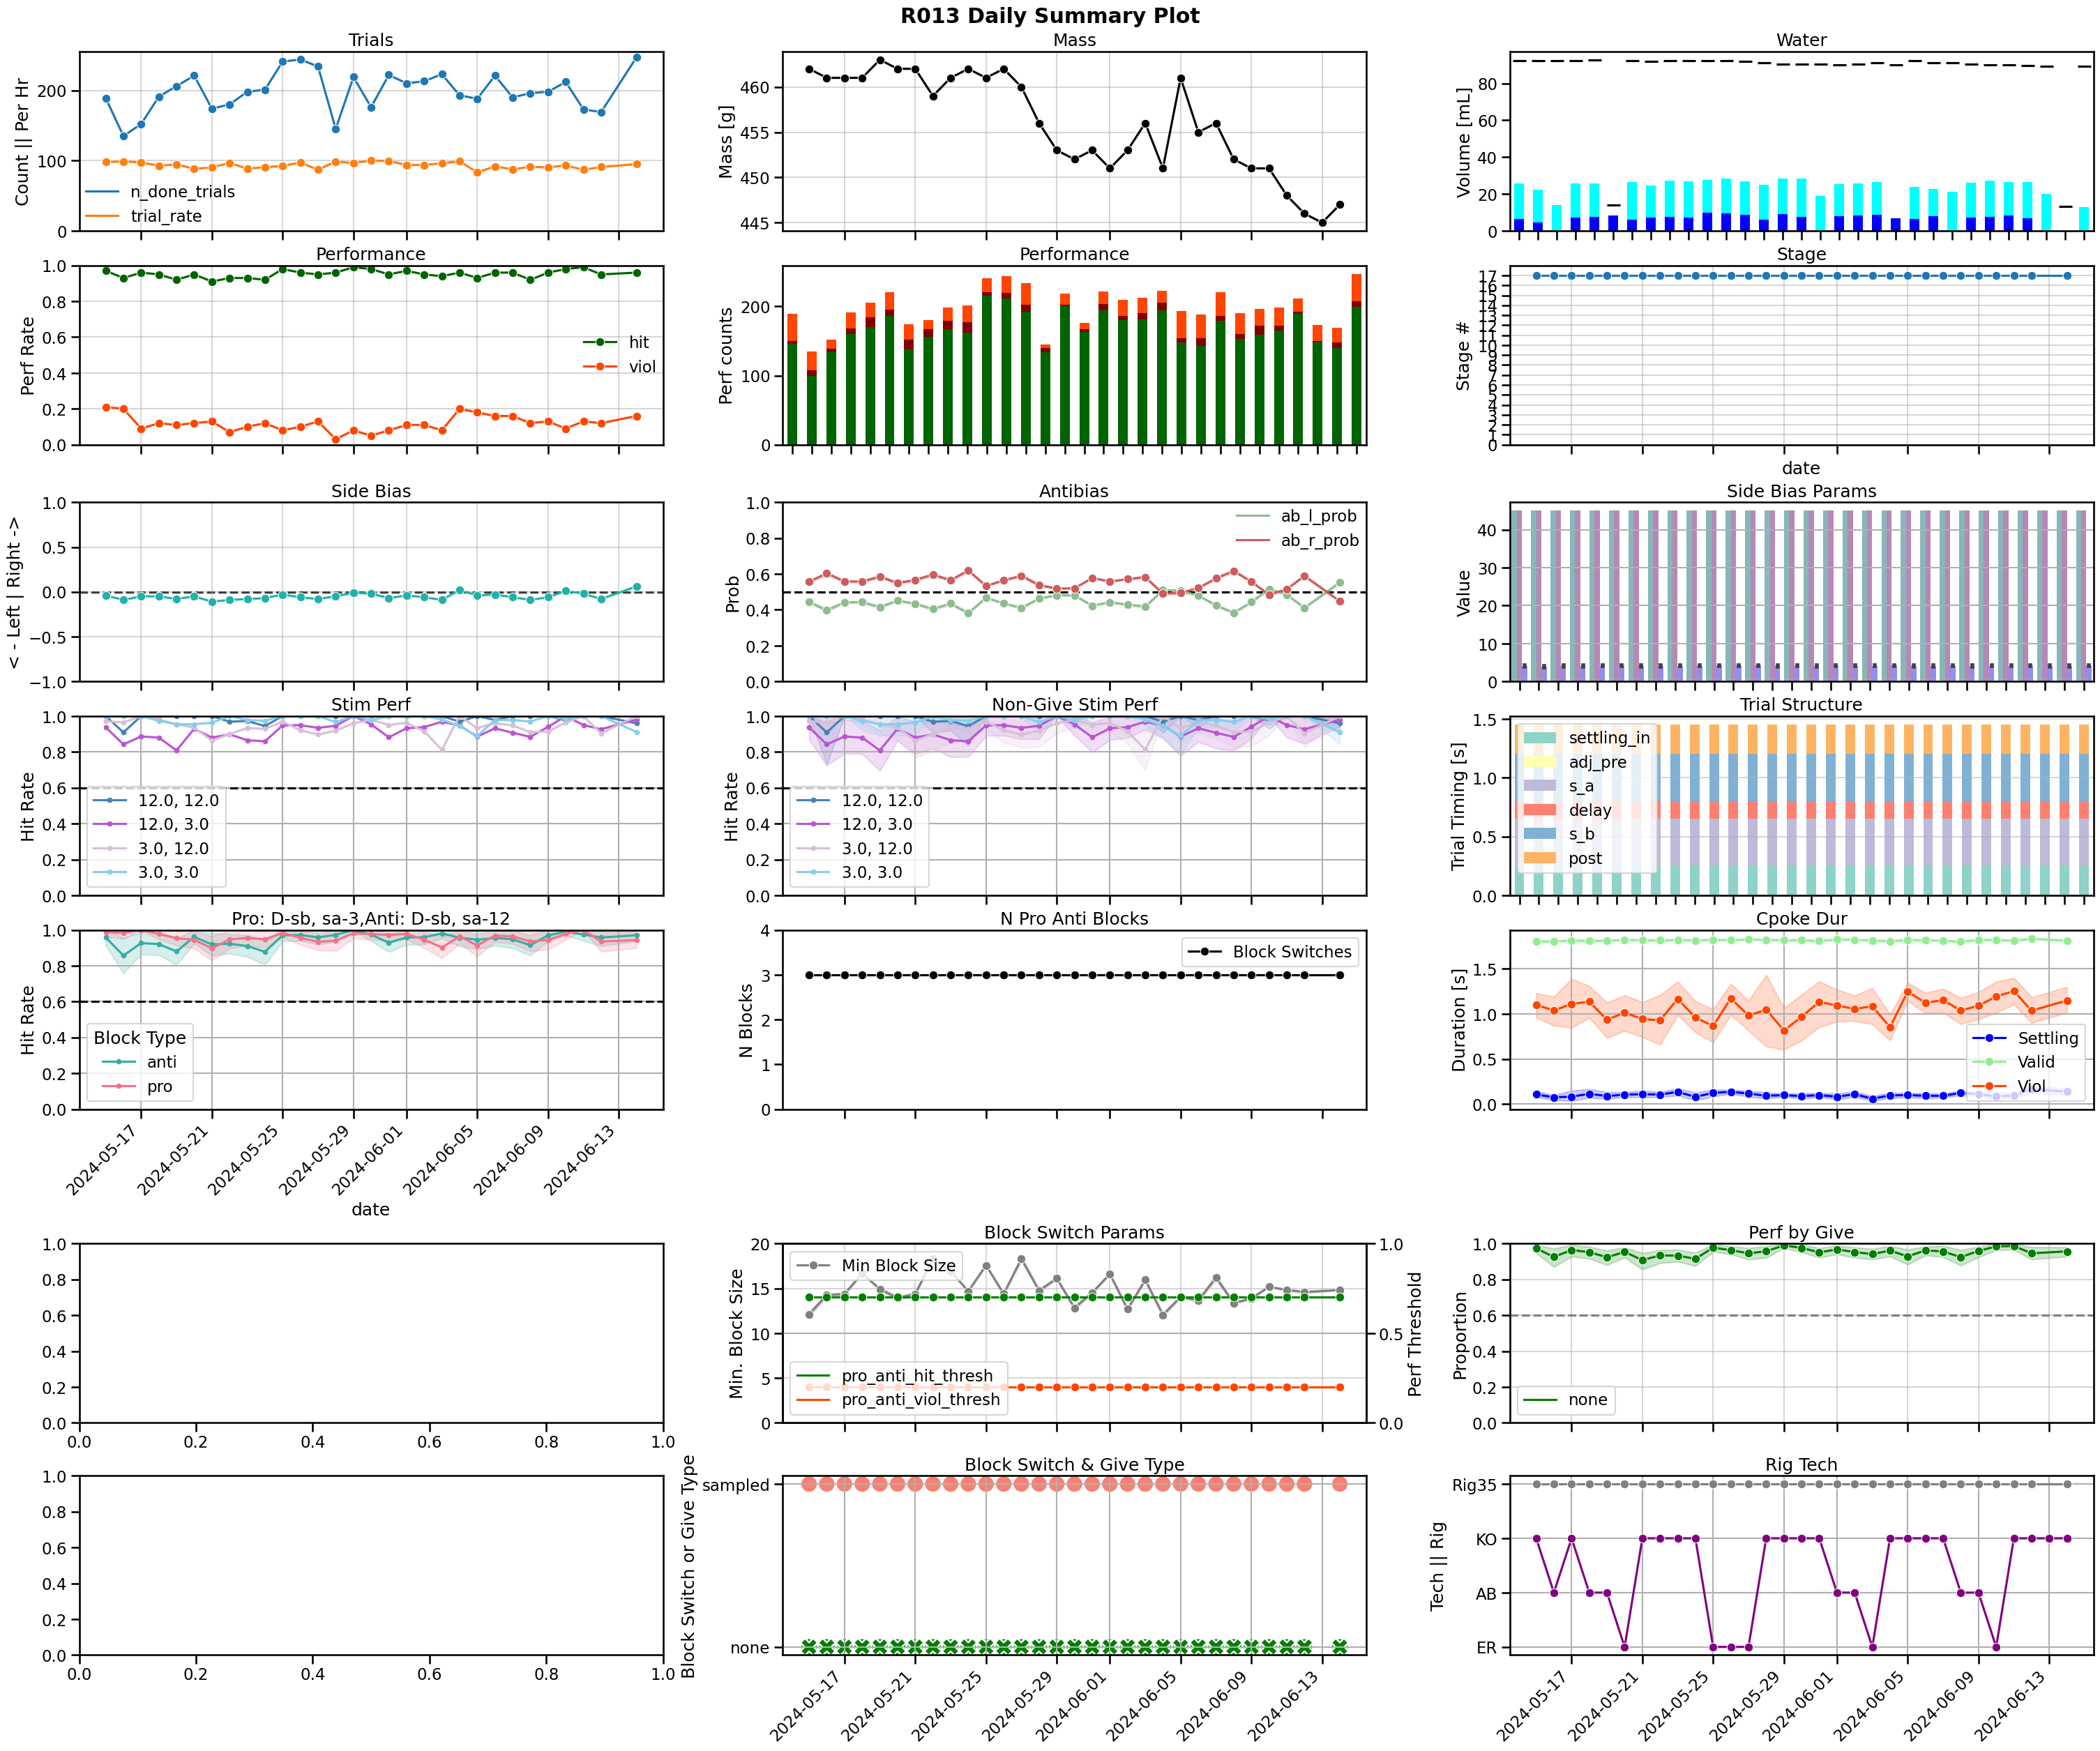

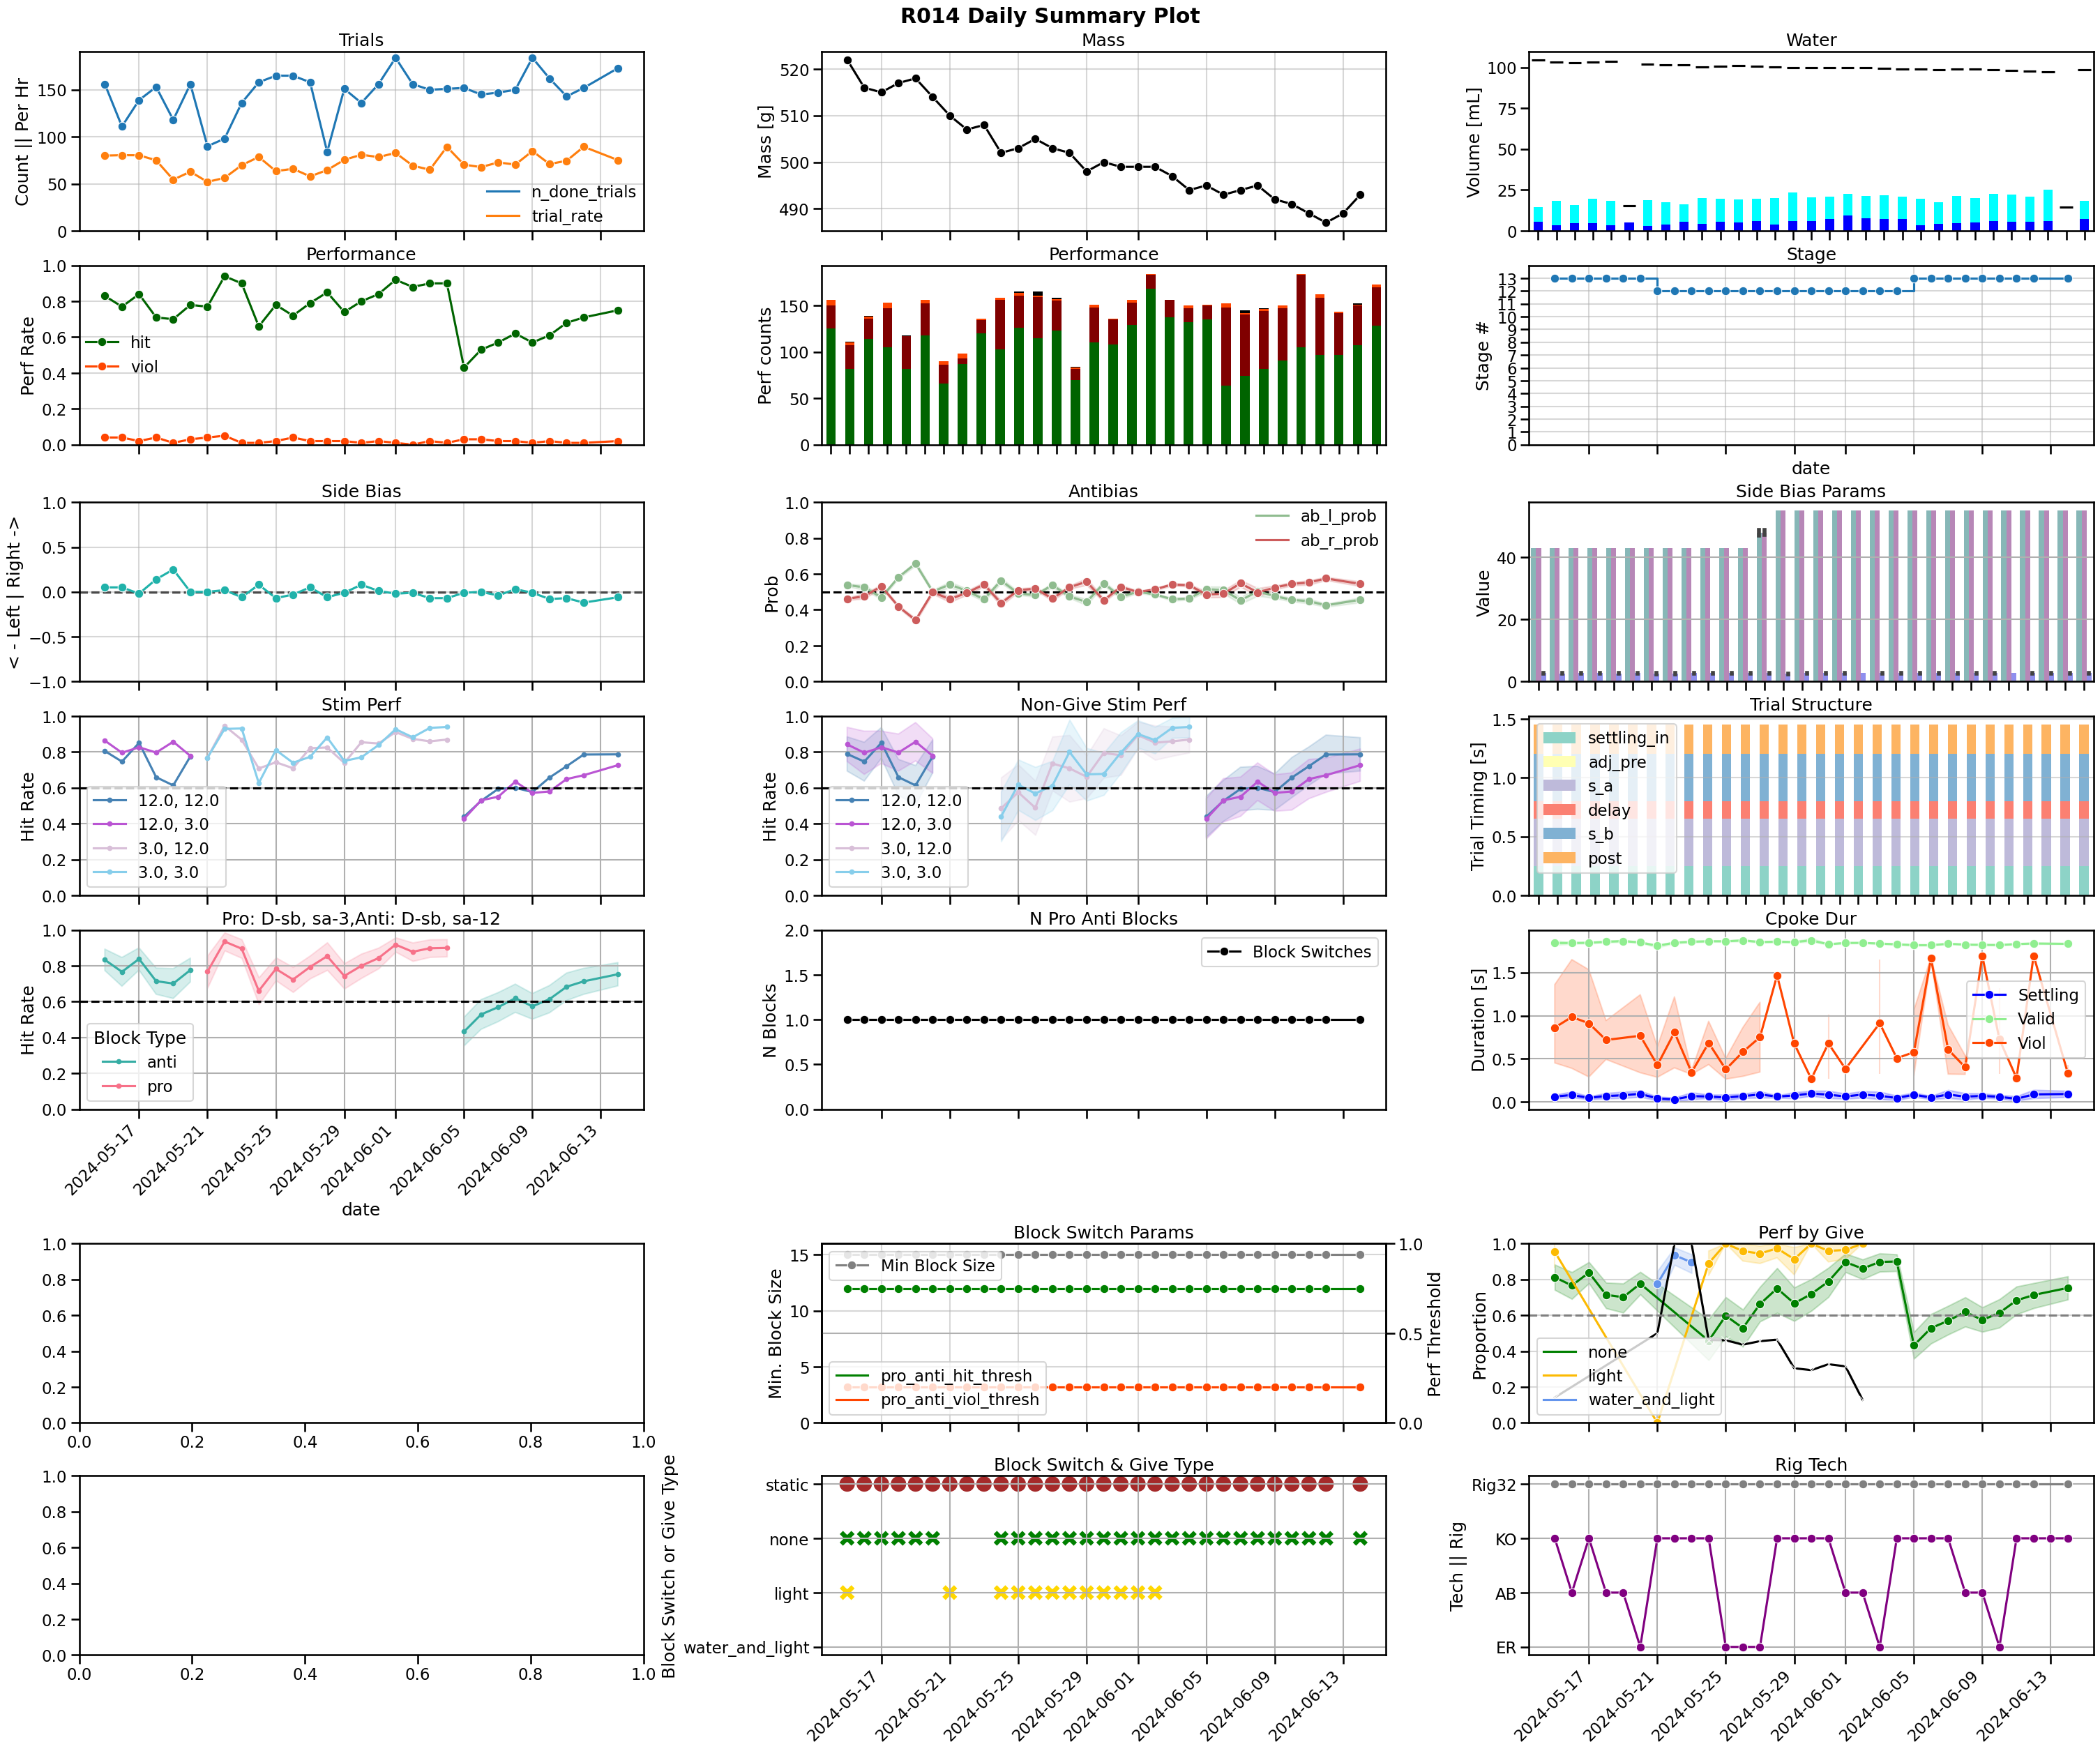

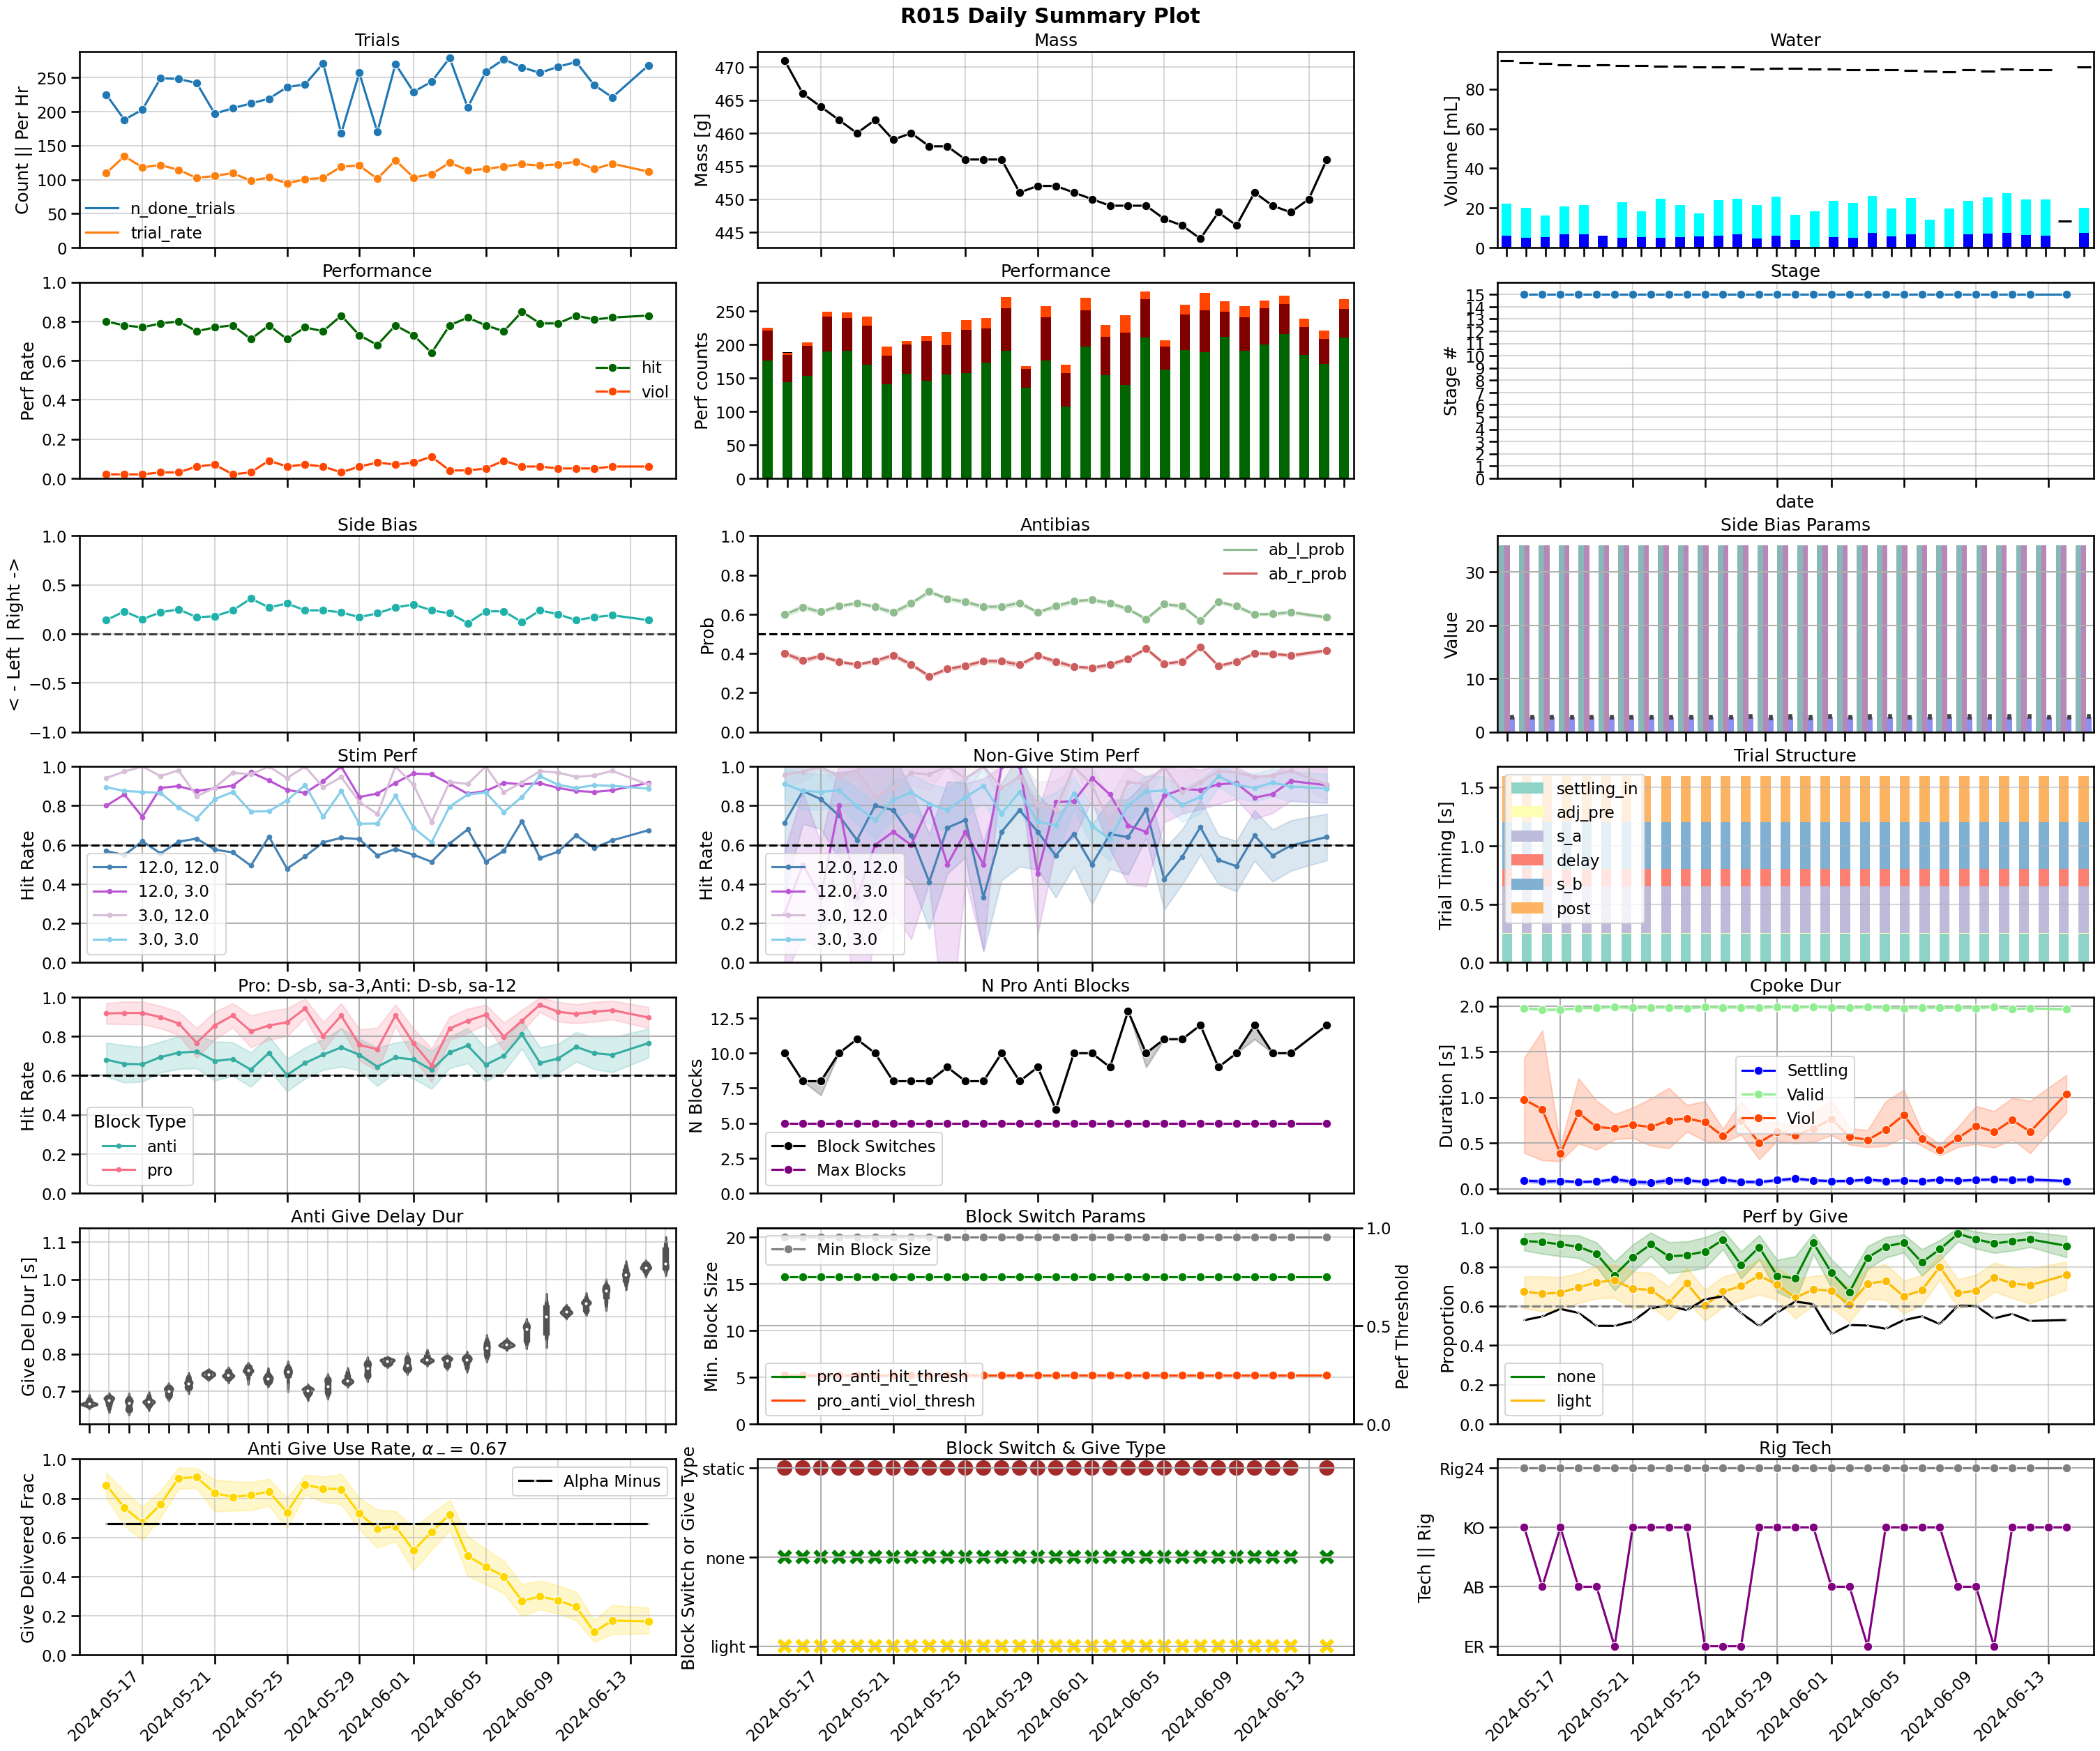

In [41]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [42]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R013_2024-06-11_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R014_2024-06-11_day_summary
['s_a']
making R015_2024-06-11_day_summary
['s_a', 'delay', 's_b', 'go']
making R013_2024-06-12_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R014_2024-06-12_day_summary
['go']
skipping violations by period due to hist error
making R015_2024-06-12_day_summary
['s_a', 'delay', 'go']
making R013_2024-06-14_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R014_2024-06-14_day_summary
['s_a']
making R015_2024-06-14_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
